# Random Forests:

## Random Forests - Introduction:

The Random Forest algorithm is a supervised machine learning algorithm that can be used for both classification and regression problems.The basic unit of a Random Forest model is a Decision Tree. As the name suggests, this algorithm randomly creates and merges multiple decision trees into one "forest". It uses *bagging* and *feature randomness* while building individual trees to try and create an **uncorrelated** forest whose prediction is more accurate than that of any individual tree.

### Advantages of Random Forests:

1. No overfitting of data.

2. Can be used for both regression and classification problems unlike most other algorithms.

3. Feature scaling not required.

4. Robust to outliers.

5. Comparatively less affected by noise.
 

## Random Forests - Working:

The fundamental idea behind a random forest, as mentioned above, is to combine many decision trees into a single model. Individually, predictions made by decision trees may not be accurate, but combined together, the prediction will be closer to the mark on average. This is because, predictions of individual trees ( if they are not overfit ) have variance, i.e, they are widely spread around the right answer. But, when multiple trees are combined together, the overall prediction almost always has lesser variance and higher accuracy.

### Bagging ( Bootstrap Aggregation):
Bootstrap Aggregation is a simple and very powerful ensemble method (a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model) that can be used to reduce the variance for those algorithm that have high variance.

Consider a dataset consisting of 1000 samples(rows).Bagging works as follows:

1. Create 100 subsets of the dataset.
2. Train a decision tree model on each of those subsets.
3. Calculate the average prediction.

For example, If 5 different trees made the class predictions blue, blue, green, blue and red, the final prediction becomes blue.

![alt text](./images/random_forest.JPG "Title")

### Feature Randomness:
The problem with using Bagging on Decision trees is that Decision trees are greedy. During splitting of a node, they choose which variable to split on using a greedy algorithm that minimizes error, i.e, they consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. This means that, almost all the individual trees are bound to choose the same set of split points thus leading to similar predictions (or) The trees have a high correlation.<br /> 
To avoid this, the random forest algorithm changes the procedure so that each Decision Tree is limited to a random sample of features of which to search. 
The number of features that can be searched at each split point (m) must be specified as a parameter to the algorithm.

1. For classification a good default is: m = sqrt(p)
2. For regression a good default is: m = p/3

where p is the total no.of features available.




## Random Forest - Implementation without sklearn.tree, sklearn.ensemble packages

In [1]:
# importing packages

import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, roc_auc_score
from sklearn.datasets import load_boston, load_iris
# DecisionTree functions
from DecisionTree import DecisionTreeClassifier, DecisionTreeRegressor

#### Bootstrap Sampling:

In Bootstrap Sampling, the given training dataset X with 'n' observations is used to generate a new training dataset X_new with 'm' observations (m may be equal to n) *with replacement*, such that the set of samples in X_new is always a subset of the set of samples in X.

Here, replacement means, each and every sample in X may occur more than once in X_new.


#### Function: random.randint()
Syntax : randint(start, end)<br />
Parameters : (start, end) : Both of them must be integer type values.<br />
Returns : A random integer in range [start, end] including the end points.<br />

In [2]:
def bootstrapSampling(X, y, max_samples = None):

    '''
    X, y - training dataset and labels with 'n' observations
    max_samples - maximum no.of samples in the new dataset
    '''
    
    # setting random seed to 0 so that
    # the final output doesnt change 
    # random.seed(0)
    
    # If max_samples is not given, return the whole training dataset
    if not max_samples:
        return X, y

    # Create two empty lists for X_new and y_new 
    tempX = []
    tempy = []

    # Run a while loop max_samples times
    while len(tempX) < max_samples:
    # BEGIN
        
        # Choose an index at random between 0 and n
        index = random.randint(0, X.shape[0]-1)

        # Store the sample present at 'index'
        # after converting it into a list 
        tempSampleX = list(X[index])
        tempSampley = y[index]

        # Append the local values to the temporary list
        tempX.append(tempSampleX)
        tempy.append(tempSampley)
    # END

    # Convert tempX, tempy into numpy arrays 
    # and store them in X_new, y_new respectively
    X_new = np.array(tempX)
    y_new = np.array(tempy)
    
    return X_new, y_new

In [3]:
#np.random.seed(0)
X = np.random.randint(0, 10, (50, 5))
y = np.random.randint(0, 10, 50)
X_new, y_new = bootstrapSampling(X, y, 10)
print(X_new)
print(y_new)



[[5 1 5 4 9]
 [1 3 6 4 5]
 [0 2 0 5 8]
 [8 6 5 2 4]
 [0 3 6 0 1]
 [3 6 8 2 4]
 [4 4 5 9 4]
 [0 3 6 0 1]
 [3 4 3 7 0]
 [6 3 1 8 6]]
[2 7 0 8 4 5 1 4 5 0]


#### Feature Selection:

Here, the given training dataset X with 'n' features is used to generate a new training dataset X_new with 'm' features (m may be equal to n) *without replacement*, such that the set of samples in X_new is always a subset of the set of samples in X.

Here, replacement means, each and every sample in X may occur more than once in X_new.<br />

#### Functions used: numpy.random.choice(a, size=None, replace=True)
Generates a random sample from a given 1-D array.<br/>
Parameters:<br />	
a : 1-D array-like; A random sample is generated from its elements.

size : int or tuple of ints; Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn.

replace : boolean; Whether the sample is with or without replacement.

In [4]:
def selectFeatures(X, max_features = None):

    '''
    X - training dataset with 'n' observations
    max_features - maximum no.of features to be selected
    '''

    # Checking if max_features is None, meaning 
    # that it is not specified. If true, 
    # return X as such
    if not max_features:
        return X    

    # choosing maxfeatures no.of samples at random, sorting and storing them in 'features' 
    features = np.sort(np.random.choice(X.shape[1], max_features, replace = False))
    
    # Returning modified training set
    return X[:, features]

In [5]:
X = np.random.randint(0, 10, (10, 10))
y = np.random.randint(0, 10, 50)
X_new = selectFeatures(X)
print(X)
print(X_new)

[[4 0 8 9 1 6 5 4 4 5]
 [3 2 3 2 6 5 4 1 9 1]
 [0 2 9 3 2 4 0 6 3 7]
 [7 4 4 1 9 8 0 7 5 7]
 [8 2 2 8 9 0 9 8 3 1]
 [4 1 8 5 2 1 4 4 0 6]
 [8 5 3 5 0 9 1 1 2 7]
 [4 6 2 2 9 7 2 4 3 7]
 [7 4 0 8 1 5 2 9 0 4]
 [3 9 9 9 8 6 2 8 6 1]]
[[4 0 8 9 1 6 5 4 4 5]
 [3 2 3 2 6 5 4 1 9 1]
 [0 2 9 3 2 4 0 6 3 7]
 [7 4 4 1 9 8 0 7 5 7]
 [8 2 2 8 9 0 9 8 3 1]
 [4 1 8 5 2 1 4 4 0 6]
 [8 5 3 5 0 9 1 1 2 7]
 [4 6 2 2 9 7 2 4 3 7]
 [7 4 0 8 1 5 2 9 0 4]
 [3 9 9 9 8 6 2 8 6 1]]


#### RandomForest.Fit():

This function is used to create 'n_estimators' Decision Trees and train them each on different subsets of the original dataset.

 

#### Criterion / Cost Function:

For Classification:

'gini': Gini Index is calculated by subtracting the sum of squared probabilities of each class from one.

 &nbsp;&nbsp;&nbsp;![alt text](./images/gini.png "Title")

<br />
Where, $P_{i}$ is the probability of occurence of class $i$.
<br />
<br />
For Regression:

'mse': Mean Squared Error (MSE) of an estimator measures the average of the squares of the errors, i.e, the average squared difference between the estimated values and the actual value.

 &nbsp;&nbsp;&nbsp;![alt text](./images/mse.png "Title")
<br />


In [6]:
def fit(X, y, n_estimators = 100, bootstrap = True, max_samples = None, task = 'classification'):
    
    '''
    X, y: Training dataset at labels.
    n_estimators: No.of Decision Trees.
    bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
    max_samples: If bootstrap is True, the number of samples to draw from X to train each tree.
    task: classification or regression.
    '''

    # Create an empty list to store n_estimators trees
    trees = []

    # Run a loop n_esimators times
    for i in range(n_estimators):
        
        # Check if the user wants bootstrap sampling
        if bootstrap == True:
            
            # if yes, create a new training dataset
            X_new, y_new = bootstrapSampling(X, y, max_samples)

        # Create a Decision tree model based on the type of task specified
        if task == 'classification':
            tree = DecisionTreeClassifier()
        else:
            tree = DecisionTreeRegressor()
        
        # Fit the model
        _ = tree.fit(X_new, y_new)
        
        # Append the model to 'trees'
        trees.append(tree)

    return trees


#### RandomForest.Predict():

This function is used to output the mode of the classes (classification) or mean prediction (regression) of the individual trees.

#### Useful functions:<br />
**np.swapaxes**: (a, axis1, axis2): Interchange two axes of an array.

**np.mean**: (a, axis=None, dtype=None, out=None): Compute the arithmetic mean along the specified axis.

**np.argmax**: (a, axis=None, out=None): Returns the indices of the maximum values along an axis.

In [7]:
def predict(trees, X_test, task = 'classification'):

    '''
    trees: list of individual trees created.
    X_test: Test dataset
    task: classification or regression
    '''

    # create a temporary list for storing predictions of individual trees 
    tempPred = []

    # traverse through all the individual trees
    # and store the returned predictions in tempPred
    for i in trees:
        prediction = i.predict(X_test)
        tempPred.append(prediction)
    
    # Convert tempPred into a numpy array
    # and swap its axes such that predictions by
    # individual trees for one sample
    # are present in the same row
    tempPred = np.array(tempPred)
    tempPred = np.swapaxes(tempPred, 0, 1)

    predictions = []

    # Traverse through all the rows of tempPred
    for i in range(tempPred.shape[0]):

        # if the task is classification, append
        # the mode of all classes present in that row
        # to 'predictions'
        if task == 'classification':
            modeIndex = np.argmax(tempPred[i])
            predictions.append(tempPred[i , modeIndex])
        
        # if the task is regression, append
        # the mean of all values present in that row
        # to 'predictions' 
        else:
            meanValue = np.mean(tempPred[i])
            predictions.append(np.mean(meanValue))
    

    return np.array(predictions)

## RandomForestClassifier Class:

In [8]:
class RandomForestClassifier:

    def __init__ (self, n_estimators = 100, min_samples_split = 2, max_depth = 5, max_features = None,
                  bootstrap = True, max_samples = None):

        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split 
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.max_samples = max_samples
        self.trees = []

    def bootstrapSampling(self, X, y):

        if not self.max_samples:
            return X, y
        tempX = []
        tempy = []
        while len(tempX) < self.max_samples:
            index = random.randint(0, X.shape[0]-1)
            tempSampleX = list(X[index])
            tempSampley = y[index]
            tempX.append(tempSampleX)
            tempy.append(tempSampley)
        X_new = np.array(tempX)
        y_new = np.array(tempy)
        
        return X_new, y_new
    
    def selectFeatures(self, X):

        if not self.max_features:
            return X    
        features = np.sort(np.random.choice(X.shape[1], self.max_features, replace = False))
        return X[:, features]

    def fit(self, X, y):
        
        for i in range(self.n_estimators):
            
            if self.bootstrap == True:
                X_new, y_new = self.bootstrapSampling(X, y)

            X_new = self.selectFeatures(X_new)
            tree = DecisionTreeClassifier(min_size= self.min_samples_split,max_depth= self.max_depth)
            tree.fit(X_new, y_new.reshape(-1, 1))
            self.trees.append(tree)

        return self.trees

    def predict(self, X):

        predictions = []
        tempPred = []

        for i in self.trees:
            prediction = i.predict(X_test)
            tempPred.append(prediction)
        
        tempPred = np.array(tempPred)
        tempPred = np.swapaxes(tempPred, 0, 1)

        for i in range(tempPred.shape[0]):
            modeIndex = np.argmax(tempPred[i])
            predictions.append(tempPred[i , modeIndex])

        return np.array(predictions)



## RandomForestRegressor Class:

In [9]:
class RandomForestRegressor:

    def __init__ (self, n_estimators = 100, min_samples_split = 2, max_depth = 5, max_features = None,
                  bootstrap = True, max_samples = None):

        self.n_estimators = n_estimators
        self.min_samples_split = min_samples_split 
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.max_samples = max_samples
        self.trees = []


    def bootstrapSampling(self, X, y):

        if not self.max_samples:
            return X, y
        tempX = []
        tempy = []
        while len(tempX) < self.max_samples:
            index = random.randint(0, X.shape[0]-1)
            tempSampleX = list(X[index])
            tempSampley = y[index]
            tempX.append(tempSampleX)
            tempy.append(tempSampley)
        X_new = np.array(tempX)
        y_new = np.array(tempy)
        
        return X_new, y_new
    
    def selectFeatures(self, X):

        if not self.max_features:
            return X    
        features = np.sort(np.random.choice(X.shape[1], self.max_features, replace = False))
        return X[:, features]

    def fit(self, X, y):
        
        for i in range(self.n_estimators):
            
            if self.bootstrap == True:
                X_new, y_new = self.bootstrapSampling(X,y)

            X_new = self.selectFeatures(X_new)
            tree = DecisionTreeRegressor(min_size= self.min_samples_split,max_depth= self.max_depth)
            tree.fit(X_new, y_new.reshape(-1, 1))
            self.trees.append(tree)

    def predict(self, X):

        predictions = []
        tempPred = []

        for i in self.trees:
            prediction = i.predict(X_test)
            tempPred.append(prediction)
        
        tempPred = np.array(tempPred)
        tempPred = np.swapaxes(tempPred, 0, 1)

        for i in range(tempPred.shape[0]):
            meanValue = np.mean(tempPred[i])
            predictions.append(np.mean(meanValue))

        return np.array(predictions)



### Classification Example

In [10]:
# Loading iris dataset into df
df = load_iris()

# Storing data, target and 
# target names ( setosa, virginica, versicolor) in 
# X, y, classes respectively
X = df['data']
y = df['target']
classes = df['target_names']

In [11]:
# Split Test and Train Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [12]:
# Creating a classifier model
classifier_model = RandomForestClassifier(n_estimators=200, bootstrap=True, max_depth = 2, max_samples=90, min_samples_split=10)
# Other parameters such as max_depth, criterion, etc can be added too

# Fit the model with X_train, y_train
_ = classifier_model.fit(X_train, y_train)

# This may take a while to execute

# '_' is added as a throwaway variable, i.e, it is used to suppress
# any output that may be returned by the function. 

In [13]:
# Call predict function
y_pred = classifier_model.predict(X_test)

#### Model performance evaluation

In [14]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.54      0.70        13
           2       0.50      1.00      0.67         6

    accuracy                           0.80        30
   macro avg       0.83      0.85      0.79        30
weighted avg       0.90      0.80      0.80        30



In [15]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0  7  6]
 [ 0  0  6]]


### Regression Example

In [16]:
# Loading Boston house prices dataset 
df=load_boston()
# In RandomForest algorithm, there is no need to standardise data since features are in no way inter dependent.
X=df['data']
y=df['target']
# Split Test and Train Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [17]:

# Creating a regressor model
regressor_model = RandomForestRegressor(n_estimators=30, bootstrap=True, min_samples_split=20, max_depth = 2, max_samples= 100)
# Other parameters such as max_depth, criterion, etc can be added too

# Fit the model with X_train, y_train
_ = regressor_model.fit(X_train, y_train)

# This may take a while to execute

# '_' is added as a throwaway variable, i.e, it is used to suppress
# any output that may be returned by the function. 

In [18]:
# Call predict function
y_pred = regressor_model.predict(X_test)

#### Model performance evaluation

In [19]:
print(r2_score(y_test, y_pred))

0.6172563246621807


In [20]:
print(mean_squared_error(y_test, y_pred))

31.16622004357298


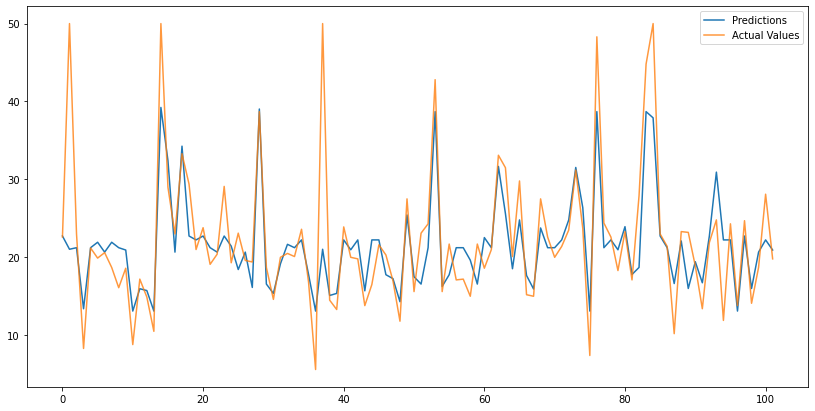

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(y_pred, label = 'Predictions');
plt.plot(y_test, alpha = 0.8, label = 'Actual Values');
plt.legend();

## Random Forest - Implementation with sklearn.tree, sklearn.ensemble packages

### Classification Example

In [22]:
# Importing sklearn's RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier as Rfc

# Loading iris dataset into df
df = load_iris()

# Storing data, target and 
# target names ( setosa, virginica, versicolor) in 
# X, y, classes respectively
X = df['data']
y = df['target']
classes = df['target_names']

# Split Test and Train Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [23]:
# Creating a classifier model
classifier_model = Rfc(n_estimators=10, bootstrap=True, max_samples=60)
# Other parameters such as max_depth, criterion, etc can be added too

# Fit the model with X_train, y_train
_ = classifier_model.fit(X_train, y_train)
# '_' is added as a throwaway variable, i.e, it is used to suppress
# any output that may be returned by the function. 

In [24]:
y_pred = classifier_model.predict(X_test)

print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [25]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


### Regression Example

In [26]:
# Importing sklearn's RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor as Rfr


# Loading Boston house prices dataset 
df=load_boston()
# In RandomForest algorithm, there is no need to standardise data since features are in no way inter dependent.
X=df['data']
y=df['target']
# Split Test and Train Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [27]:
# Creating a regressor model
regressor_model = Rfr(n_estimators=30, bootstrap=True, min_samples_split=20, max_depth = 2, max_samples= 100)
# Other parameters such as max_depth, criterion, etc can be added too

# Fit the model with X_train, y_train
_ = regressor_model.fit(X_train, y_train)
# '_' is added as a throwaway variable, i.e, it is used to suppress
# any output that may be returned by the function. 

In [28]:
# Call predict function
y_pred = regressor_model.predict(X_test)

#### Model performance evaluation

In [29]:
print(r2_score(y_test, y_pred))

0.6261997640609135


In [30]:
print(mean_squared_error(y_test, y_pred))

30.437969733489474


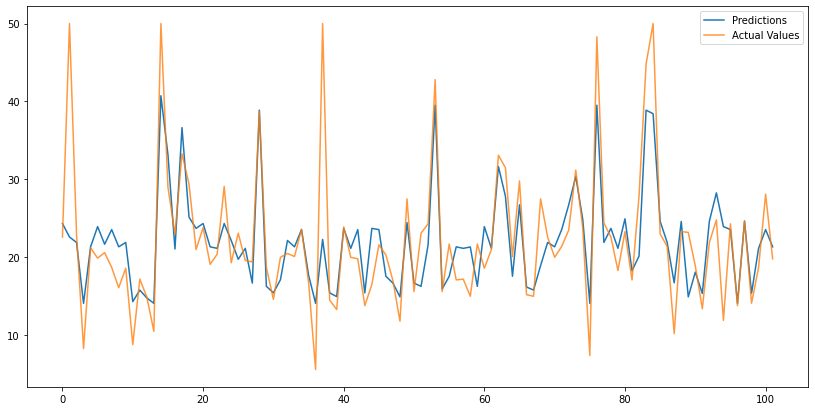

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(y_pred, label = 'Predictions');
plt.plot(y_test, alpha = 0.8, label = 'Actual Values');
plt.legend();